In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_curve,confusion_matrix,auc
from sklearn.utils import resample

In [ ]:
df=pd.read_csv('/content/pd_speech_features[1].csv')
df.shape

(756, 755)

In [ ]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [ ]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
df.tail()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0
755,251,0,0.81304,0.76471,0.46374,340,339,0.005676,0.000037,0.00078,...,62.9927,21.8152,9.2457,4.8555,3.0551,3.0415,4.0116,2.6217,3.1527,0


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Length: 756, dtype: bool

In [ ]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [ ]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


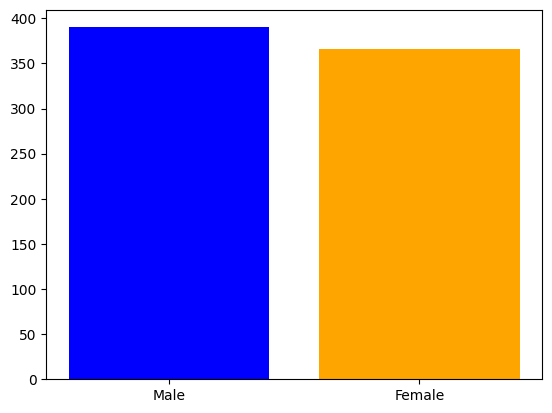

In [ ]:
val=df['gender'].value_counts()
plt.bar([0,1],val.values,color=['blue','orange'])
plt.xticks([0,1],['Male','Female'])
plt.show()

In [ ]:
df.groupby('gender')['class'].value_counts()

gender  class
0       1        243
        0        123
1       1        321
        0         69
Name: class, dtype: int64

In [ ]:
df.groupby('class').mean()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
class,,,,,,,,,,,,,,,,,,,,,
0,139.421875,0.359375,0.767434,0.663866,0.430807,372.244792,371.031250,0.005699,0.000290,0.001405,...,47.053772,45.754404,32.006881,21.592319,14.797452,10.726868,9.021939,9.619535,9.326543,15.074830
1,120.760638,0.569149,0.739084,0.712856,0.508888,307.539007,306.218085,0.006585,0.000414,0.002637,...,12.165554,19.593113,19.719812,17.565102,13.556976,12.726897,13.516916,16.562531,16.598373,37.066227


In [ ]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [ ]:
maj=df[df['class']==1]
min=df[df['class']==0]

In [ ]:
under_maj=maj.sample(n=192)
df_new=pd.concat([under_maj,min],axis=0)
df_new=df_new.sample(frac=1,random_state=2)
df_new['class'].value_counts()

0    192
1    192
Name: class, dtype: int64

In [ ]:
df_new.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
89,29,0,0.82760,0.63579,0.24278,404,403,0.004779,0.000031,0.00064,...,175.2876,123.4963,27.7693,5.2906,4.1913,4.3029,3.9654,3.2715,2.9646,0
426,142,1,0.35512,0.69771,0.50633,415,413,0.003496,0.000218,0.00221,...,40.4331,16.5212,8.7433,12.4601,42.4415,41.3807,25.0060,19.7864,83.9067,1
618,206,0,0.81693,0.64964,0.34552,435,434,0.004437,0.000063,0.00125,...,27.3201,16.1401,6.0743,4.2506,4.3097,6.3370,20.5038,18.6774,56.5714,1
118,39,1,0.84137,0.73558,0.41782,234,233,0.008253,0.000081,0.00177,...,43.0289,37.1365,36.2467,32.6067,45.4335,48.1864,40.1460,39.5734,87.5750,1
94,31,1,0.84239,0.76833,0.53120,228,227,0.008475,0.000122,0.00274,...,1.5331,2.1119,61.4740,53.4244,57.8517,45.4478,40.3039,36.9850,83.5710,1


In [ ]:
X=df_new.drop(['class'],axis=1)
y=df_new['class']

In [ ]:
X.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
89,29,0,0.82760,0.63579,0.24278,404,403,0.004779,0.000031,0.00064,...,215.4478,175.2876,123.4963,27.7693,5.2906,4.1913,4.3029,3.9654,3.2715,2.9646
426,142,1,0.35512,0.69771,0.50633,415,413,0.003496,0.000218,0.00221,...,30.4092,40.4331,16.5212,8.7433,12.4601,42.4415,41.3807,25.0060,19.7864,83.9067
618,206,0,0.81693,0.64964,0.34552,435,434,0.004437,0.000063,0.00125,...,36.1213,27.3201,16.1401,6.0743,4.2506,4.3097,6.3370,20.5038,18.6774,56.5714
118,39,1,0.84137,0.73558,0.41782,234,233,0.008253,0.000081,0.00177,...,1.5508,43.0289,37.1365,36.2467,32.6067,45.4335,48.1864,40.1460,39.5734,87.5750
94,31,1,0.84239,0.76833,0.53120,228,227,0.008475,0.000122,0.00274,...,1.6130,1.5331,2.1119,61.4740,53.4244,57.8517,45.4478,40.3039,36.9850,83.5710


In [ ]:
y.value_counts()

0    192
1    192
Name: class, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(307, 754) (77, 754) (307,) (77,)


In [ ]:
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='linear')

In [ ]:
model.fit(X_train_s,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=model.predict(X_test_s)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
acc=accuracy_score(y_pred,y_test)
acc

0.8311688311688312

In [ ]:
prec=precision_score(y_test,y_pred)
prec

0.8378378378378378

In [ ]:
recall=recall_score(y_test,y_pred)
recall

0.8157894736842105

In [ ]:
f1=f1_score(y_test,y_pred)
f1

0.8266666666666665

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[33,  6],
       [ 7, 31]])

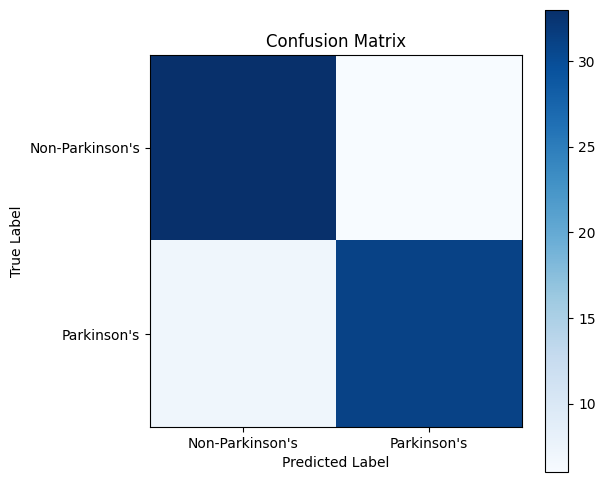

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(2), ['Non-Parkinson\'s', 'Parkinson\'s'])
plt.yticks(np.arange(2), ['Non-Parkinson\'s', 'Parkinson\'s'])
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

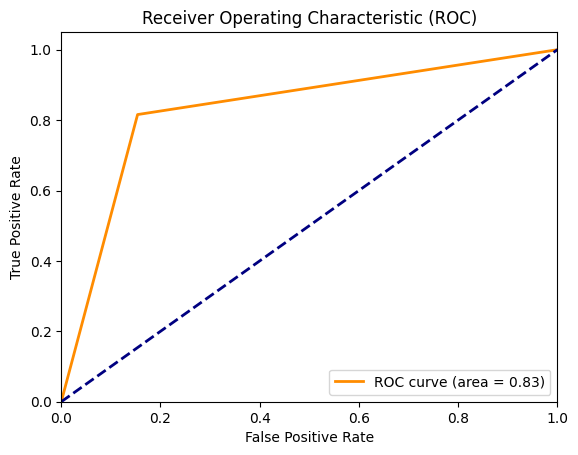

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()